# <p style='text-align: center;'> Flipkart Mobiles Data Analysis </p>

In this project, I am going to scrap the flipkart mobiles data using Python through web scraping. Web scraping is a technique to automate the extraction process of a large amount of data from the website. The data present on the websites will be in unstructured format but with the help of Web scraping, we can scrape, access, and store the data in a much more structured and clean format for your further analysis.

<b> How does Web Scraping work?
    
When we run the code for web scraping, a request is sent to the URL that we have mentioned. As a response to the request, the server sends the data and allows us to read the HTML or XML page. The code then, parses the HTML or XML page, finds the data, and extracts it.

To extract data using web scraping with python, we need to follow these basic steps:

1. Find the URL that you want to scrape
2. Inspecting the Page
3. Find the data you want to extract
4. Write the code
5. Run the code and extract the data
6. Store the data in the required format
    
    
Now let us see how to extract data from the Flipkart website using Python.

## Import the necessary libraries

In [1]:
import re
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

## Find the URL that we want to scrape

For this project, we are going scrape Flipkart website to extract the Price, Mobile Name, Rating and Features of realme	mobiles. The URL for this page is,
https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3Drealme&otracker=clp_metro_expandable_1_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q1PDG4YW86MF_wp3&fm=neo%2Fmerchandising&iid=M_0f56bed5-9d46-4897-9e81-a6c29c3e8e70_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=g065mavl1c0000001630063794491&page=1

The above link navigates to first page of the website which contains 24 mobile details, like that we are fetching multiple pages.

## Inspecting the Page
The data is usually nested in tags. So, we inspect the page to see, under which tag the data we want to scrape is nested. To inspect the page, just right click on the element and click on “Inspect”.

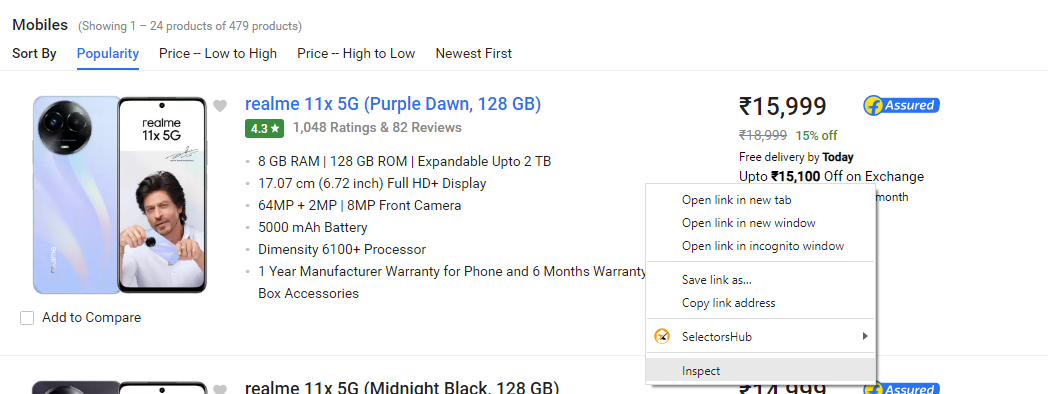

When we click on the “Inspect” tab, we will see a “Browser Inspector Box” open.

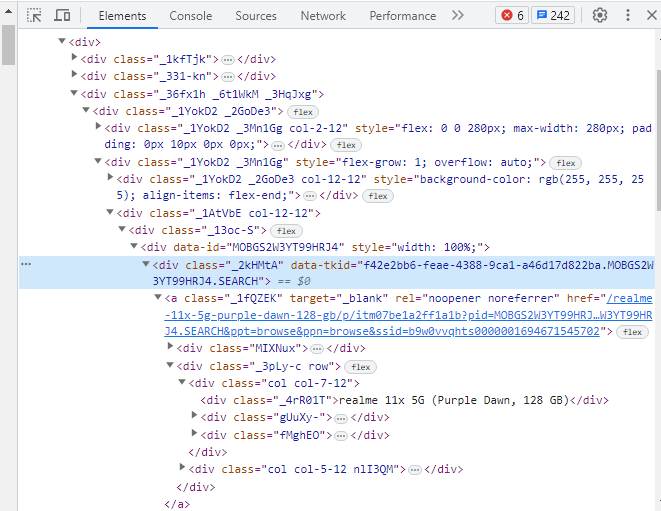

## Find the data you want to extract
Let’s extract the Price, Mobile Name, Rating and Features of realme mobiles, which is nested in the “div” tag respectively. Like that we have identified all the tags with their 'class' name and stored as shown below.

## Storing different ID's of products

In [2]:
main_div = '_2kHMtA'
sub_div = {"mobile_name":"_4rR01T", "price":"_30jeq3 _1_WHN1", "rating":"_3LWZlK", "features":"rgWa7D"}

## Creating empty lists to store different columns

In [3]:
all_phone_name     = []                # List to store mobile names 
all_phone_price    = []                # List to store mobile prices 
all_phone_rating   = []                # List to store mobile ratings
all_phone_features = []                # List to store mobile features

## Gathering data from all pages
Now that we have written the code to open the URL, it’s time to extract the data from the website. As mentioned earlier, the data we want to extract is nested in <div> tags. All main tags and sub tags are mentioned in the above. So, I will extract the data and store the data in a variable. Refer the code below:

In [4]:
for pageno in range(1,40):
    
    URL  = "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3Drealme&otracker=clp_metro_expandable_1_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q1PDG4YW86MF_wp3&fm=neo%2Fmerchandising&iid=M_0f56bed5-9d46-4897-9e81-a6c29c3e8e70_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=g065mavl1c0000001630063794491&page="+str(pageno)
    page = requests.get(URL)
    soup = BeautifulSoup(page.text)
    
    for x in soup.find_all('div', attrs = {'class':main_div}):
        
        try:
            a = x.find('div', attrs = {'class':sub_div['mobile_name']})
            all_phone_name.append(a.text)
        except:
            all_phone_name.append(np.nan)
            
        try:
            a = x.find('div', attrs = {'class':sub_div['price']})
            all_phone_price.append(a.text)
        except:
            all_phone_price.append(np.nan)
            
        try:
            a = x.find('div', attrs = {'class':sub_div['rating']})
            all_phone_rating.append(a.text)
        except:
            all_phone_rating.append(np.nan)
            
        try:
            a = x.find_all('li', attrs = {'class':sub_div['features']})
            all_phone_features.append("\n".join([features.text for features in a]))
        except:
            all_phone_features.append(np.nan)

## Checking length of all columns

In [5]:
print(len(all_phone_name))
print(len(all_phone_price))
print(len(all_phone_rating))
print(len(all_phone_features))

479
479
479
479


## Creating a DataFrame

In [6]:
df = pd.DataFrame({'Product Name':all_phone_name,
                   'Price':all_phone_price, 
                   'Rating':all_phone_rating,
                   'Features':all_phone_features})

## Storing into a 'CSV' format file

In [7]:
df.to_csv("realme_mobiles.csv")

## Loading the CSV File

In [8]:
df = pd.read_csv("realme_mobiles.csv")

In [9]:
df.head()

,Unnamed: 0,Product Name,Price,Rating,Features
0,0,"realme 11x 5G (Purple Dawn, 128 GB)","₹15,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...
1,1,"realme 11x 5G (Purple Dawn, 128 GB)","₹14,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...
2,2,"realme 11x 5G (Midnight Black, 128 GB)","₹14,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...
3,3,"realme C53 (Champion Gold, 64 GB)","₹10,999",4.4,6 GB RAM | 64 GB ROM | Expandable Upto 2 TB\n1...
4,4,"realme 11x 5G (Midnight Black, 128 GB)","₹15,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...


In [10]:
df["Product Name"] = df["Product Name"].apply(lambda x: x.replace('(','').replace(')',''))

## Seperating different features from features column

In [11]:
regex = r'([0-9][0-9]?)\s+GB'
df["RAM (GB)"] = df["Features"].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'([0-9][0-9]?[0-9]?)\s+GB\s+ROM'
df["ROM (GB)"] = df["Features"].apply(lambda x: int(re.compile(regex).findall(x)[0]) if re.compile(regex).findall(x) else None)

regex = r'([0-9]+.?[0-9]?)+\sinch'
df["Display (inch)"] = df["Features"].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'([0-9][0-9]?[0-9]?[0-9]?)+\smAh'
df["Battery (mAh)"] = df["Features"].apply(lambda x: int(re.compile(regex).findall(x)[0]) if re.compile(regex).findall(x) else None)

regex = r'\n(.*?)\sProcessor'
df["Processor"] = df["Features"].apply(lambda x: re.compile(regex).findall(x))

regex = r'\n(.*?)\sCamera'
df["Camera"] = df["Features"].apply(lambda x: re.compile(regex).findall(x))

regex = r'^\w+'
df["Brand"] = df["Product Name"].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'^\w+\s([0-9A-Za-z]+)'
df["Model"] = df["Product Name"].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'[0-9a-zA-z]+\s[0-9A-Za-z]+\s+(.*?)[,]'
df["Color"] = df["Product Name"].apply(lambda x: re.compile(regex).findall(x)[0])

In [12]:
df.head()

,Unnamed: 0,Product Name,Price,Rating,Features,RAM (GB),ROM (GB),Display (inch),Battery (mAh),Processor,Camera,Brand,Model,Color
0,0,"realme 11x 5G Purple Dawn, 128 GB","₹15,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...,8,128.0,2,5000.0,[Dimensity 6100+],[64MP + 2MP | 8MP Front],realme,11x,5G Purple Dawn
1,1,"realme 11x 5G Purple Dawn, 128 GB","₹14,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...,6,128.0,2,5000.0,[Dimensity 6100+],[64MP + 2MP | 8MP Front],realme,11x,5G Purple Dawn
2,2,"realme 11x 5G Midnight Black, 128 GB","₹14,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...,6,128.0,2,5000.0,[Dimensity 6100+],[64MP + 2MP | 8MP Front],realme,11x,5G Midnight Black
3,3,"realme C53 Champion Gold, 64 GB","₹10,999",4.4,6 GB RAM | 64 GB ROM | Expandable Upto 2 TB\n1...,6,64.0,4,5000.0,[T612],[108MP + 2MP | 8MP Front],realme,C53,Champion Gold
4,4,"realme 11x 5G Midnight Black, 128 GB","₹15,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...,8,128.0,2,5000.0,[Dimensity 6100+],[64MP + 2MP | 8MP Front],realme,11x,5G Midnight Black


## Cleaning poorly formatted columns

In [13]:
df["Price"] = df["Price"].apply(lambda x: x.replace('₹','').replace(',',''))
df["Processor"] = df["Processor"].apply(lambda x: ''.join(x))
df["Camera"] = df["Camera"].apply(lambda x: ''.join(x))

## Removing unnecessary columns

In [14]:
columns = ['Unnamed: 0','Product Name','Features']
df.drop(columns,axis=1,inplace=True)

## Re-arranging the columns

In [15]:
columns = ['Brand','Model','Price','Color','RAM (GB)','ROM (GB)',
           'Rating','Battery (mAh)','Display (inch)','Camera','Processor']

df = df[columns]

In [16]:
df.head()

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,11x,15999,5G Purple Dawn,8,128.0,4.3,5000.0,2,64MP + 2MP | 8MP Front,Dimensity 6100+
1,realme,11x,14999,5G Purple Dawn,6,128.0,4.4,5000.0,2,64MP + 2MP | 8MP Front,Dimensity 6100+
2,realme,11x,14999,5G Midnight Black,6,128.0,4.4,5000.0,2,64MP + 2MP | 8MP Front,Dimensity 6100+
3,realme,C53,10999,Champion Gold,6,64.0,4.4,5000.0,4,108MP + 2MP | 8MP Front,T612
4,realme,11x,15999,5G Midnight Black,8,128.0,4.3,5000.0,2,64MP + 2MP | 8MP Front,Dimensity 6100+


## Exporting in a CSV format

In [17]:
df.to_csv('Realme_data.csv')

## Performing EDA

In [18]:
df = pd.read_csv("Realme_data.csv")
df = df.drop('Unnamed: 0',axis=1)
df

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,11x,15999,5G Purple Dawn,8,128.0,4.3,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
1,realme,11x,14999,5G Purple Dawn,6,128.0,4.4,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
2,realme,11x,14999,5G Midnight Black,6,128.0,4.4,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
3,realme,C53,10999,Champion Gold,6,64.0,4.4,5000.0,4.0,108MP + 2MP | 8MP Front,T612
4,realme,11x,15999,5G Midnight Black,8,128.0,4.3,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
...,...,...,...,...,...,...,...,...,...,...,...
474,realme,C2,6499,Diamond Black,2,32.0,4.4,4000.0,6.1,13MP + 2MP | 5MP Front,MediaTek P22 Octa Core 2.0 GHz
475,realme,C2,8999,Diamond Ruby,3,32.0,4.4,4000.0,6.1,13MP + 2MP | 5MP Front,MediaTek P22 Octa Core 2.0 GHz
476,realme,C2,8999,Diamond Black,3,32.0,4.4,4000.0,6.1,13MP + 2MP | 5MP Front,MediaTek P22 Octa Core 2.0 GHz
477,realme,C2,8999,Diamond Sapphire,3,32.0,4.4,4000.0,6.1,13MP + 2MP | 5MP Front,MediaTek P22 Octa Core 2.0 GHz


## Check the duplicate records & delete the duplicates

In [19]:
df.duplicated().sum()

43

In [20]:
df = df.drop_duplicates(keep='first')

## Finding Null Values

In [21]:
def null(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])
null(df)

,Total,Percent
Processor,38,8.715596
Battery (mAh),5,1.146789
ROM (GB),2,0.458716
Brand,0,0.000000
Model,0,0.000000
Price,0,0.000000
Color,0,0.000000
RAM (GB),0,0.000000
Rating,0,0.000000
Display (inch),0,0.000000


In [22]:
# List of columns to consider
columns_to_check = ['Processor', 'Battery (mAh)', 'ROM (GB)']

# Drop rows with missing values in the specified columns
df = df.dropna(subset=columns).reset_index(drop=True)

In [23]:
df["ROM (GB)"] = df["ROM (GB)"].astype(int)

In [24]:
df

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,11x,15999,5G Purple Dawn,8,128,4.3,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
1,realme,11x,14999,5G Purple Dawn,6,128,4.4,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
2,realme,11x,14999,5G Midnight Black,6,128,4.4,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
3,realme,C53,10999,Champion Gold,6,64,4.4,5000.0,4.0,108MP + 2MP | 8MP Front,T612
4,realme,11x,15999,5G Midnight Black,8,128,4.3,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
...,...,...,...,...,...,...,...,...,...,...,...
388,realme,C2,6499,Diamond Black,2,32,4.4,4000.0,6.1,13MP + 2MP | 5MP Front,MediaTek P22 Octa Core 2.0 GHz
389,realme,C2,8999,Diamond Ruby,3,32,4.4,4000.0,6.1,13MP + 2MP | 5MP Front,MediaTek P22 Octa Core 2.0 GHz
390,realme,C2,8999,Diamond Black,3,32,4.4,4000.0,6.1,13MP + 2MP | 5MP Front,MediaTek P22 Octa Core 2.0 GHz
391,realme,C2,8999,Diamond Sapphire,3,32,4.4,4000.0,6.1,13MP + 2MP | 5MP Front,MediaTek P22 Octa Core 2.0 GHz


In [25]:
def null(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])
null(df)

,Total,Percent
Brand,0,0.0
Model,0,0.0
Price,0,0.0
Color,0,0.0
RAM (GB),0,0.0
ROM (GB),0,0.0
Rating,0,0.0
Battery (mAh),0,0.0
Display (inch),0,0.0
Camera,0,0.0


In [26]:
# datatype of the columns
df.dtypes

Brand              object
Model              object
Price               int64
Color              object
RAM (GB)            int64
ROM (GB)            int32
Rating            float64
Battery (mAh)     float64
Display (inch)    float64
Camera             object
Processor          object
dtype: object

In [27]:
# Columns of the dataframe
df.columns

Index(['Brand', 'Model', 'Price', 'Color', 'RAM (GB)', 'ROM (GB)', 'Rating',
       'Battery (mAh)', 'Display (inch)', 'Camera', 'Processor'],
      dtype='object')

## Analysing the Data

In [28]:
df.head()

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,11x,15999,5G Purple Dawn,8,128,4.3,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
1,realme,11x,14999,5G Purple Dawn,6,128,4.4,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
2,realme,11x,14999,5G Midnight Black,6,128,4.4,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+
3,realme,C53,10999,Champion Gold,6,64,4.4,5000.0,4.0,108MP + 2MP | 8MP Front,T612
4,realme,11x,15999,5G Midnight Black,8,128,4.3,5000.0,2.0,64MP + 2MP | 8MP Front,Dimensity 6100+


## 1) Top 10 costly mobiles (model based)

In [29]:
df1 = df.groupby(by=['Brand','Model']).first()
df1 = df1.sort_values(by='Price',ascending=False).head(10)
df1.reset_index(inplace=True)
df1

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,X50,41999,Pro Rust Red,8,128,4.4,4200.0,4.0,64MP + 12MP + 8MP + 2MP | 32MP + 8MP Dual Front,Qualcomm Snapdragon 865
1,realme,X3,34999,SuperZoom Arctic White,12,256,4.2,4200.0,7.0,64MP + 8MP + 8MP + 2MP | 32MP + 8MP Dual Front,Qualcomm Snapdragon 855+
2,realme,GT,24999,2 Steel Black,8,128,4.3,5000.0,2.0,50MP + 8MP + 2MP | 16MP Front,Qualcomm Snapdragon 888
3,realme,X2,21825,Pro Neptune Blue,8,128,4.5,4000.0,6.5,64MP + 13MP + 8MP + 2MP | 16MP Front,Qualcomm Snapdragon 855 Plus
4,realme,7,20999,Mist White,8,128,4.3,5000.0,6.5,64MP + 8MP + 2MP + 2MP | 16MP Front,MediaTek Helio G95
5,realme,X,20999,Polar White,8,128,4.5,3765.0,3.0,48MP + 5MP | 16MP Front,Qualcomm Snapdragon 710 Octa Core 2.2 GHz AIE
6,realme,11,19999,5G Glory Gold,8,256,4.3,5000.0,2.0,108MP + 2MP | 16MP Front,Dimensity 6100+
7,realme,X7,19999,5G Space Silver,6,128,4.3,4310.0,3.0,64MP + 8MP + 2MP | 16MP Front,MediaTek Dimensity 800U
8,realme,5,17999,Pro Sparkling Blue,8,128,4.5,4035.0,6.3,48MP + 8MP + 2MP + 2MP Quad,Qualcomm Snapdragon SDM712 Octa Core 2.3 GHz
9,realme,9,17999,5G SE Azure Glow,8,128,4.3,5000.0,6.6,48MP + 2MP + 2MP | 16MP Front,Qualcomm Snapdragon 778G


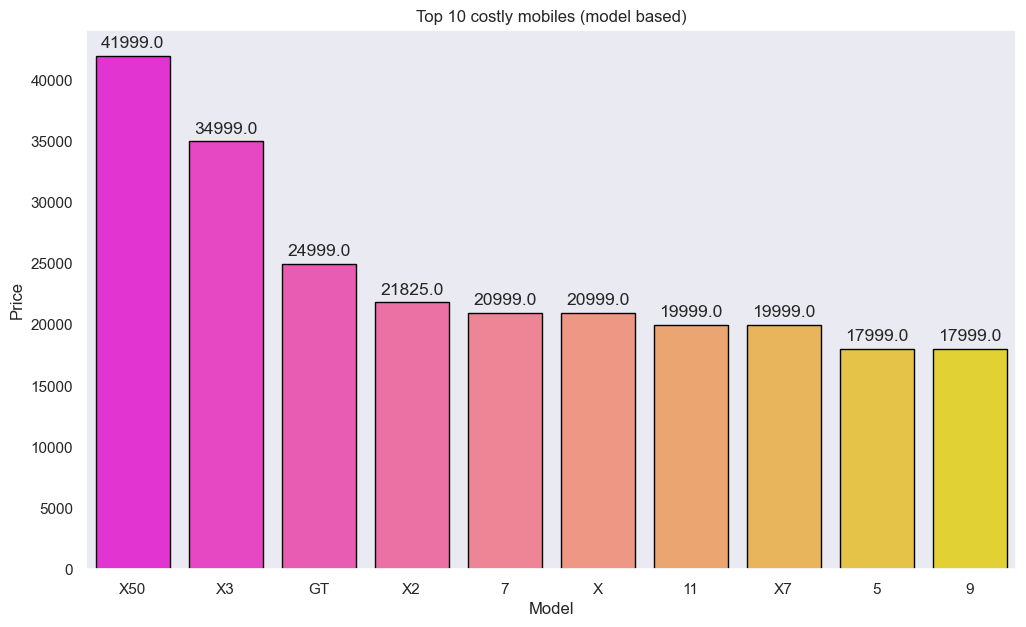

In [30]:
colors = sns.color_palette('spring',10)
sns.set(rc={'figure.figsize':(12,7)})
a = sns.barplot(df1['Model'],df1['Price'],palette=colors,edgecolor='black')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.grid(False)
plt.title('Top 10 costly mobiles (model based)')
plt.show()

## 2) Rating of Top 10 costly models

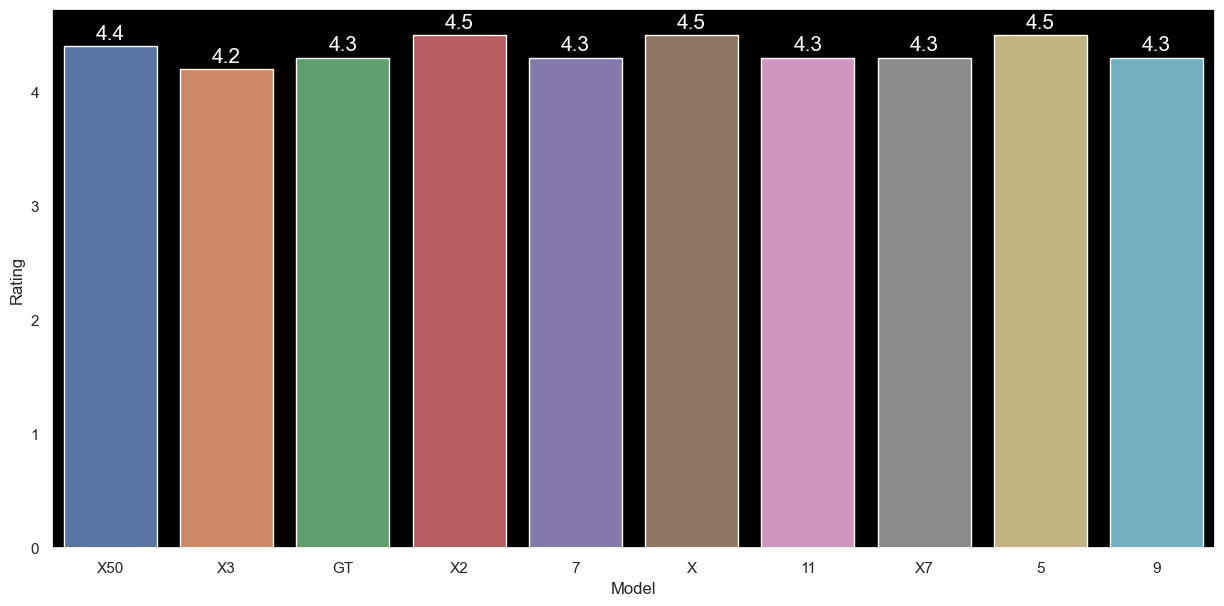

In [31]:
sns.set(rc={'figure.figsize':(15,7)})
a = sns.barplot(x="Model",y="Rating",data=df1)
a.set_facecolor("black")
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',color='white',fontsize=15)
plt.grid(False)

## 3) Battery Size for Top 10 costly mobiles

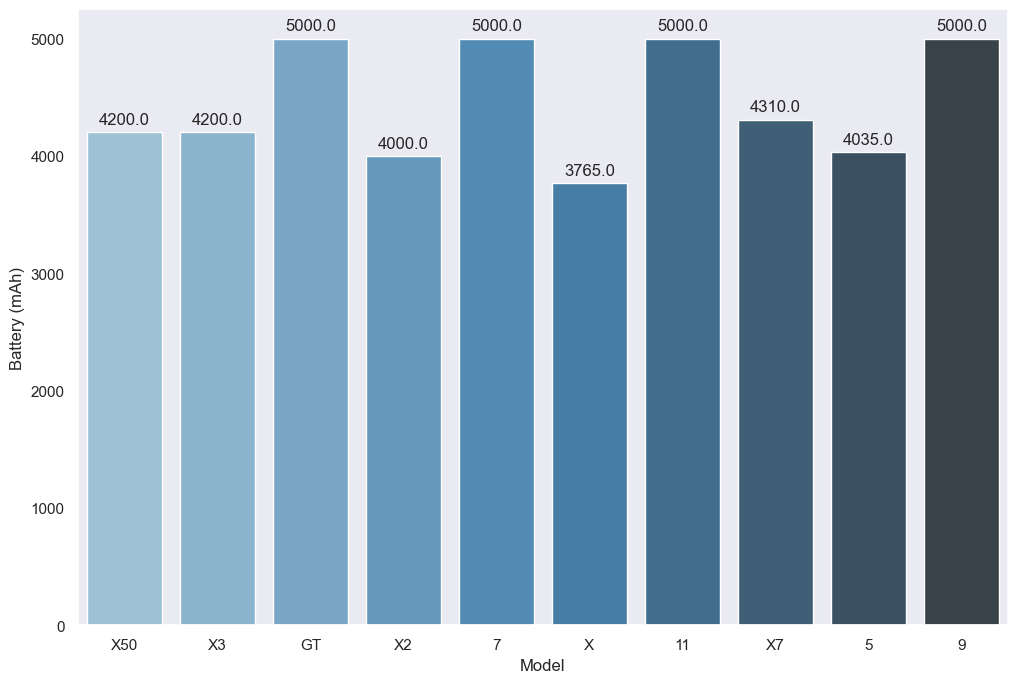

In [32]:
colors = sns.color_palette('summer_r',10)
sns.set(rc={'figure.figsize':(12,8)})
a = sns.barplot(df1['Model'],df1['Battery (mAh)'],palette='Blues_d')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12)
plt.grid(False)
plt.show()

## 4) RAM & ROM size for Top 10 costly models

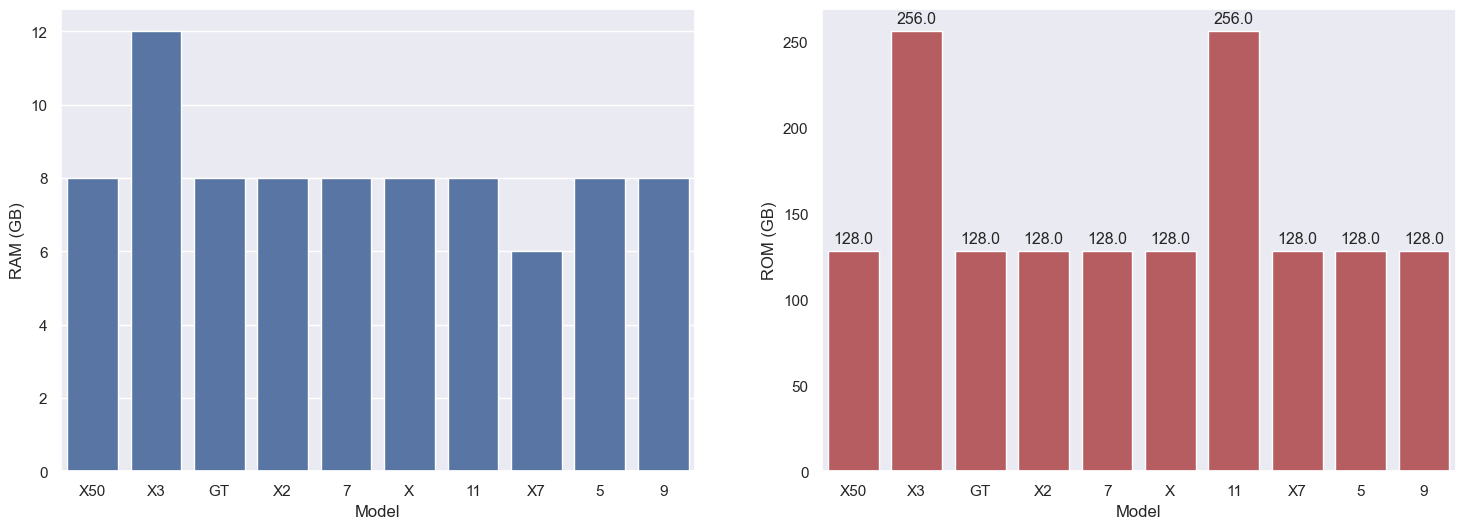

In [33]:
f, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(x='Model',y='RAM (GB)',color='b',data=df1,ax=axes[0])

b = sns.barplot(x='Model',y='ROM (GB)',color='r',data=df1,ax=axes[1])
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
plt.grid(False)

## 5) Ratings count of all models

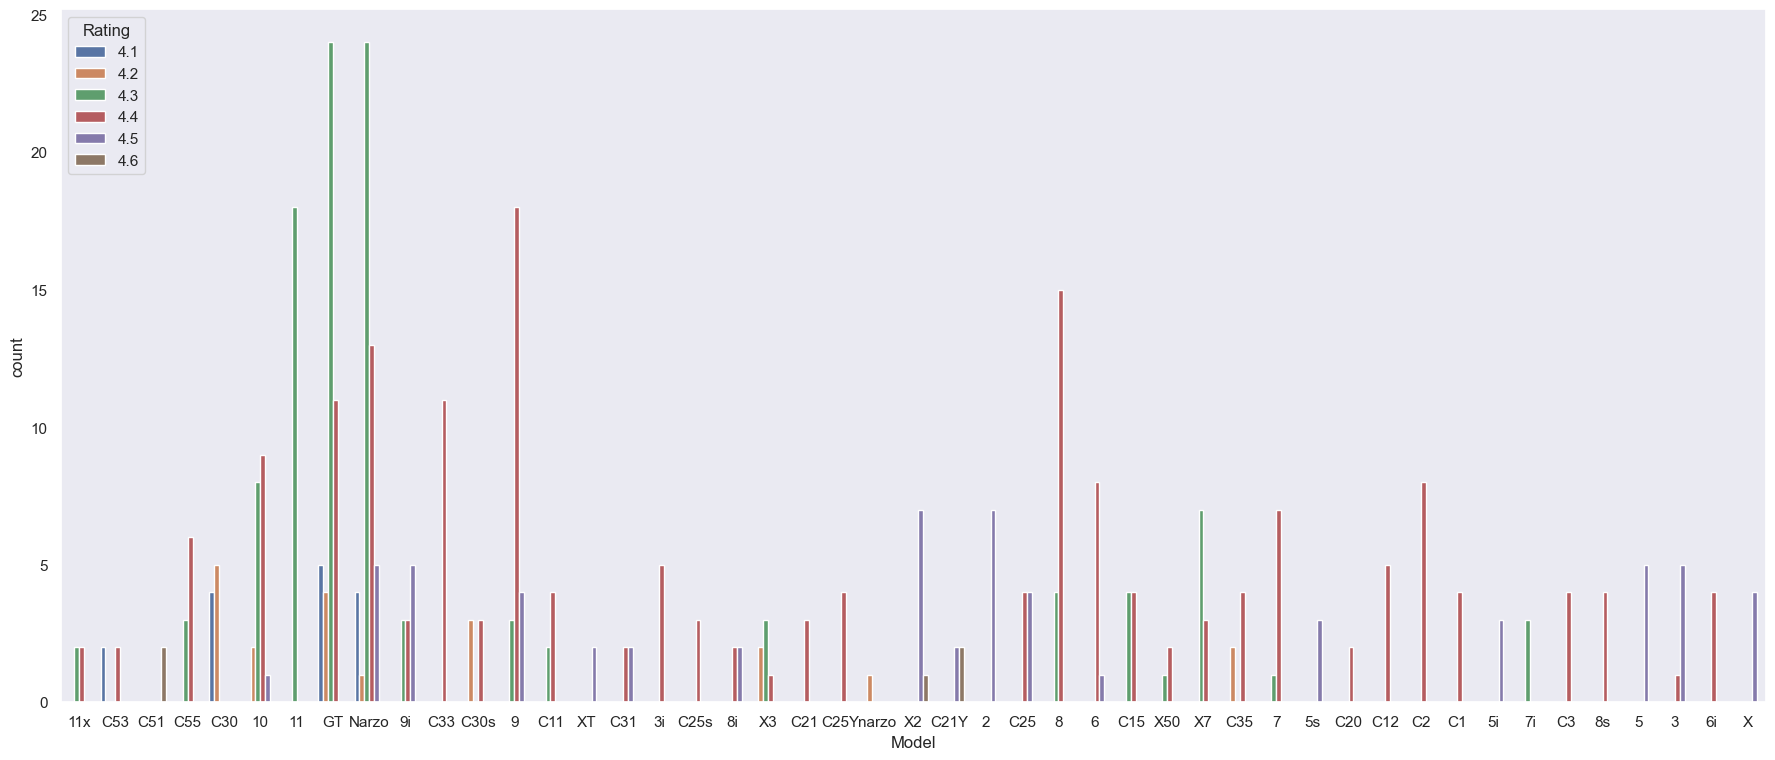

In [34]:
sns.set(rc={'figure.figsize':(22,9)})
sns.countplot(x='Model',hue='Rating',data = df)
plt.grid(False)
plt.show()

## 6) Count of Processors for different models

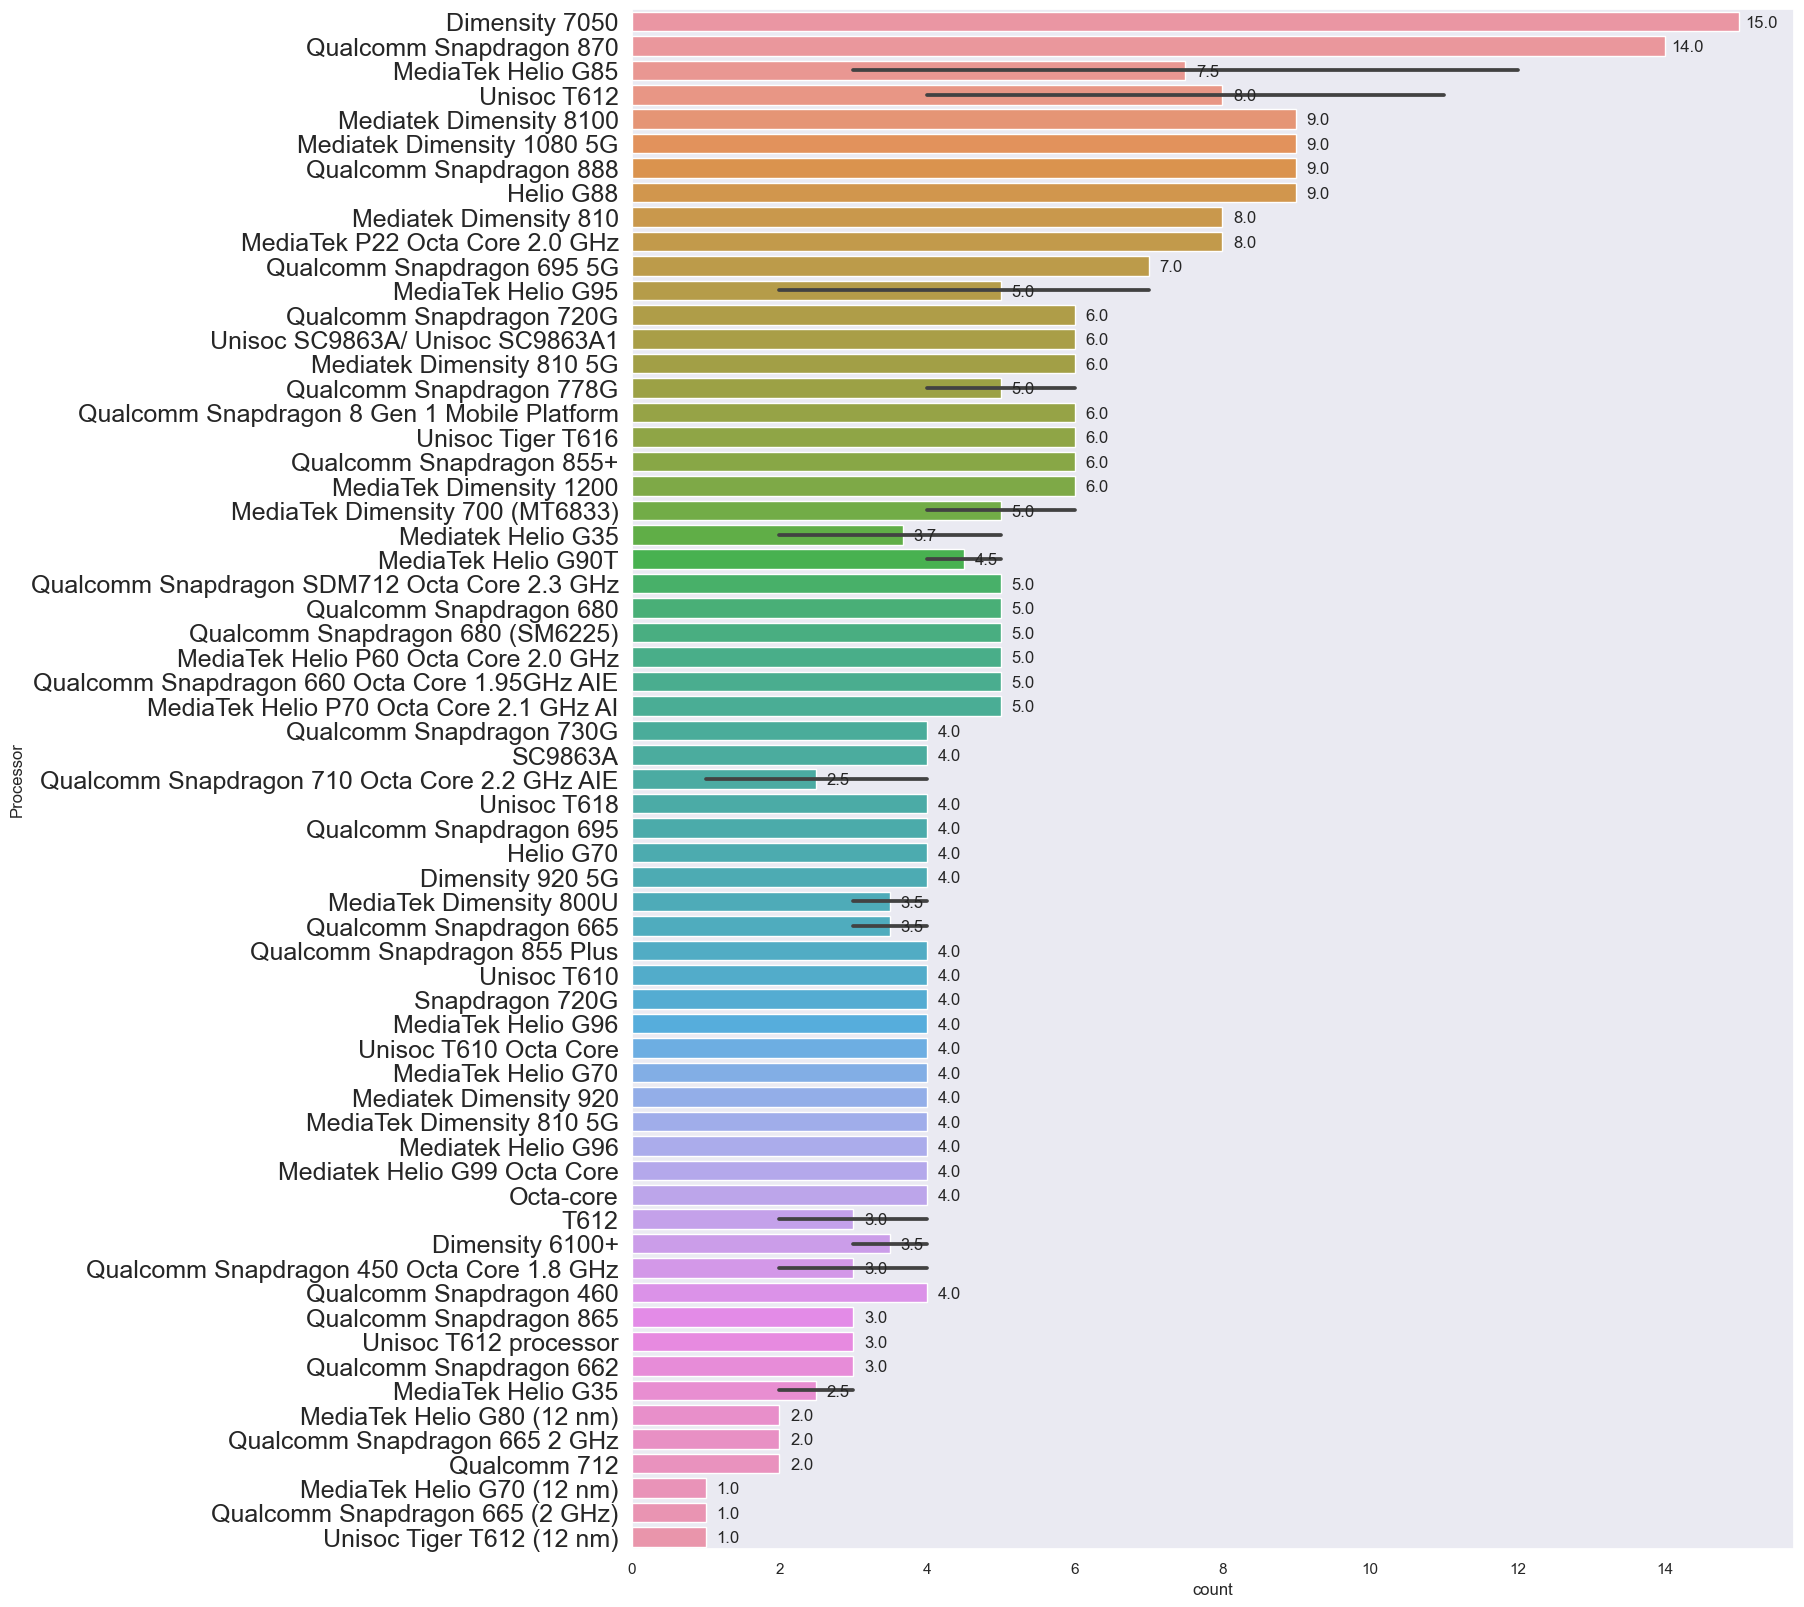

In [35]:
df_unique_processors = df.groupby(by=['Processor','Model'])['Price'].count().reset_index().rename(columns={"Price":"count"})
df_unique_processors = df_unique_processors.sort_values(by='count',ascending=False).reset_index()
df_unique_processors.drop('index',axis=1,inplace=True)
sns.set(rc={'figure.figsize':(15,20)})
plt.yticks(fontsize=18)
a = sns.barplot(y='Processor',x='count',data=df_unique_processors)
for p in a.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center')
plt.grid(False)

## 7) Count of Display size for all mobiles

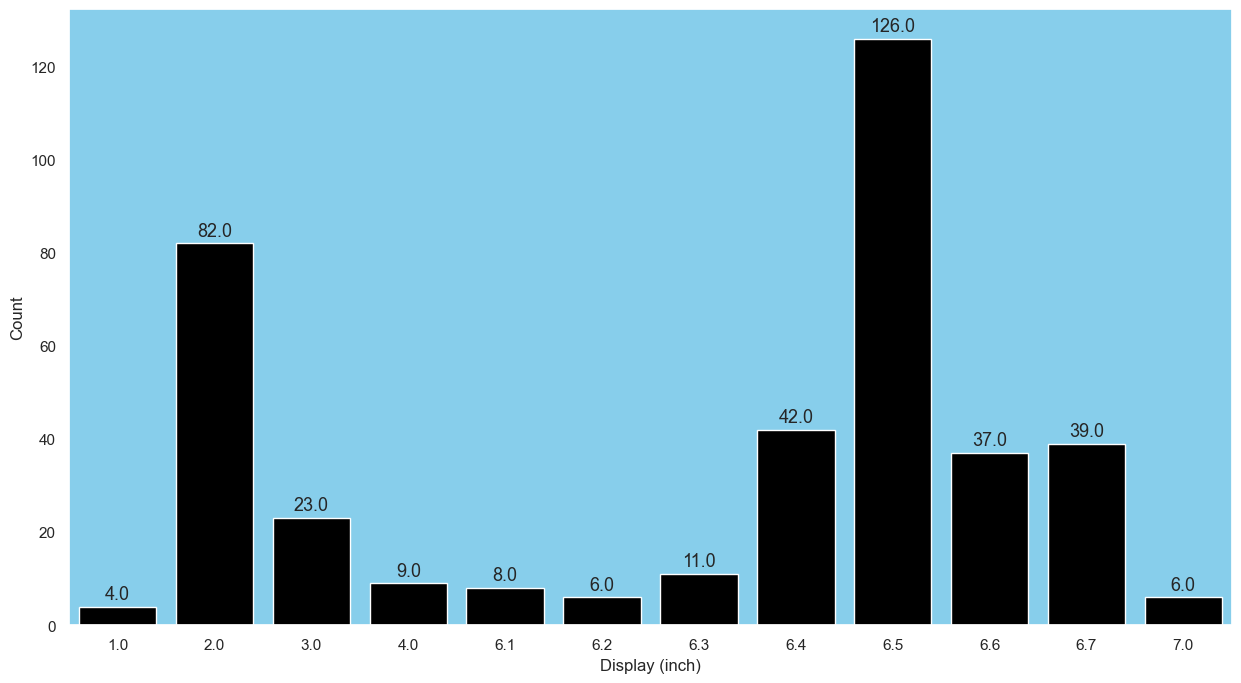

In [36]:
df_display = df["Display (inch)"].value_counts().reset_index().rename(columns={'index':'Display (inch)',
                                                                               'Display (inch)':'Count'})
df_display.sort_values(by='Count',ascending=False,inplace=True)
sns.set(rc={'figure.figsize':(15,8)})
a = sns.barplot(x='Display (inch)',y='Count',data=df_display,color='black')
a.set_facecolor("skyblue")
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=13)
plt.grid(False)

## 8) Number of mobile based on model

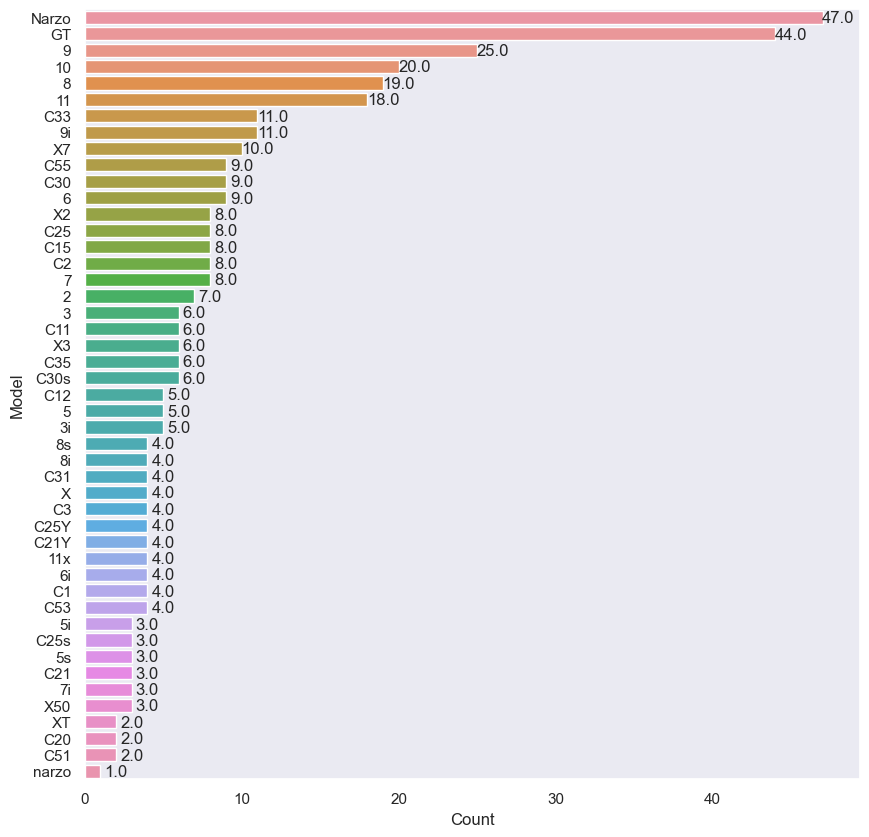

In [37]:
df_model = df.groupby(by='Model')["Price"].count().reset_index().rename(columns={'Price':'Count'})
df_model = df_model.sort_values('Count',ascending=False)
sns.set(rc={'figure.figsize':(10,10)})
a = sns.barplot(y="Model",x="Count",data=df_model)
for p in a.patches:
    width = p.get_width()
    plt.text(1+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center')
plt.grid(False)

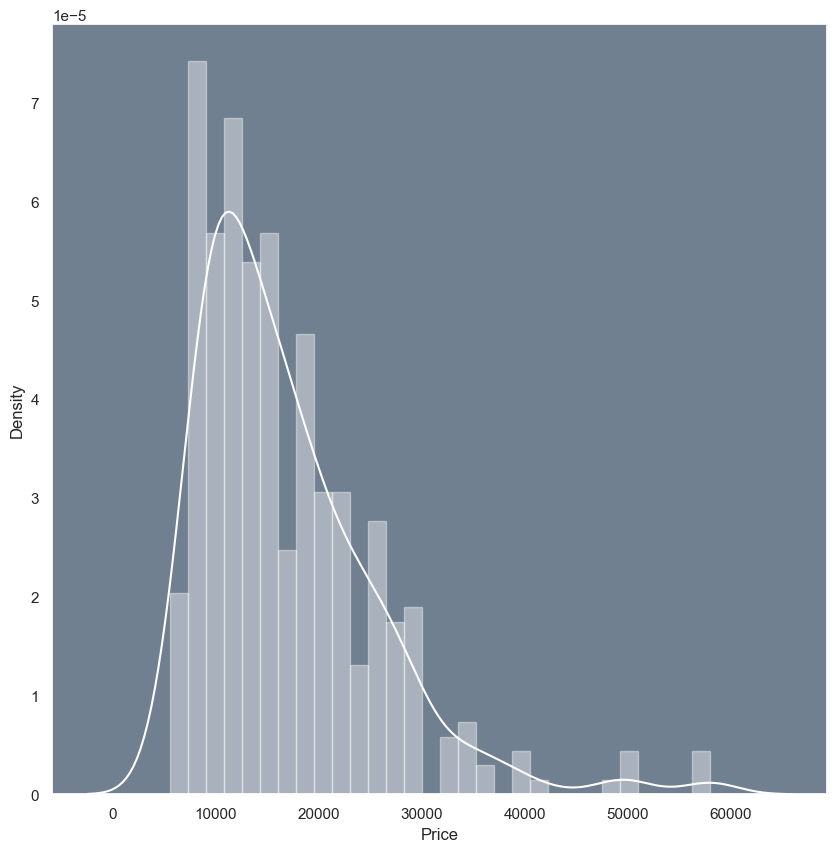

In [38]:
a = sns.distplot(df['Price'],color='white',bins=30)
a.set_facecolor("slategrey")
plt.grid(False)
plt.show()

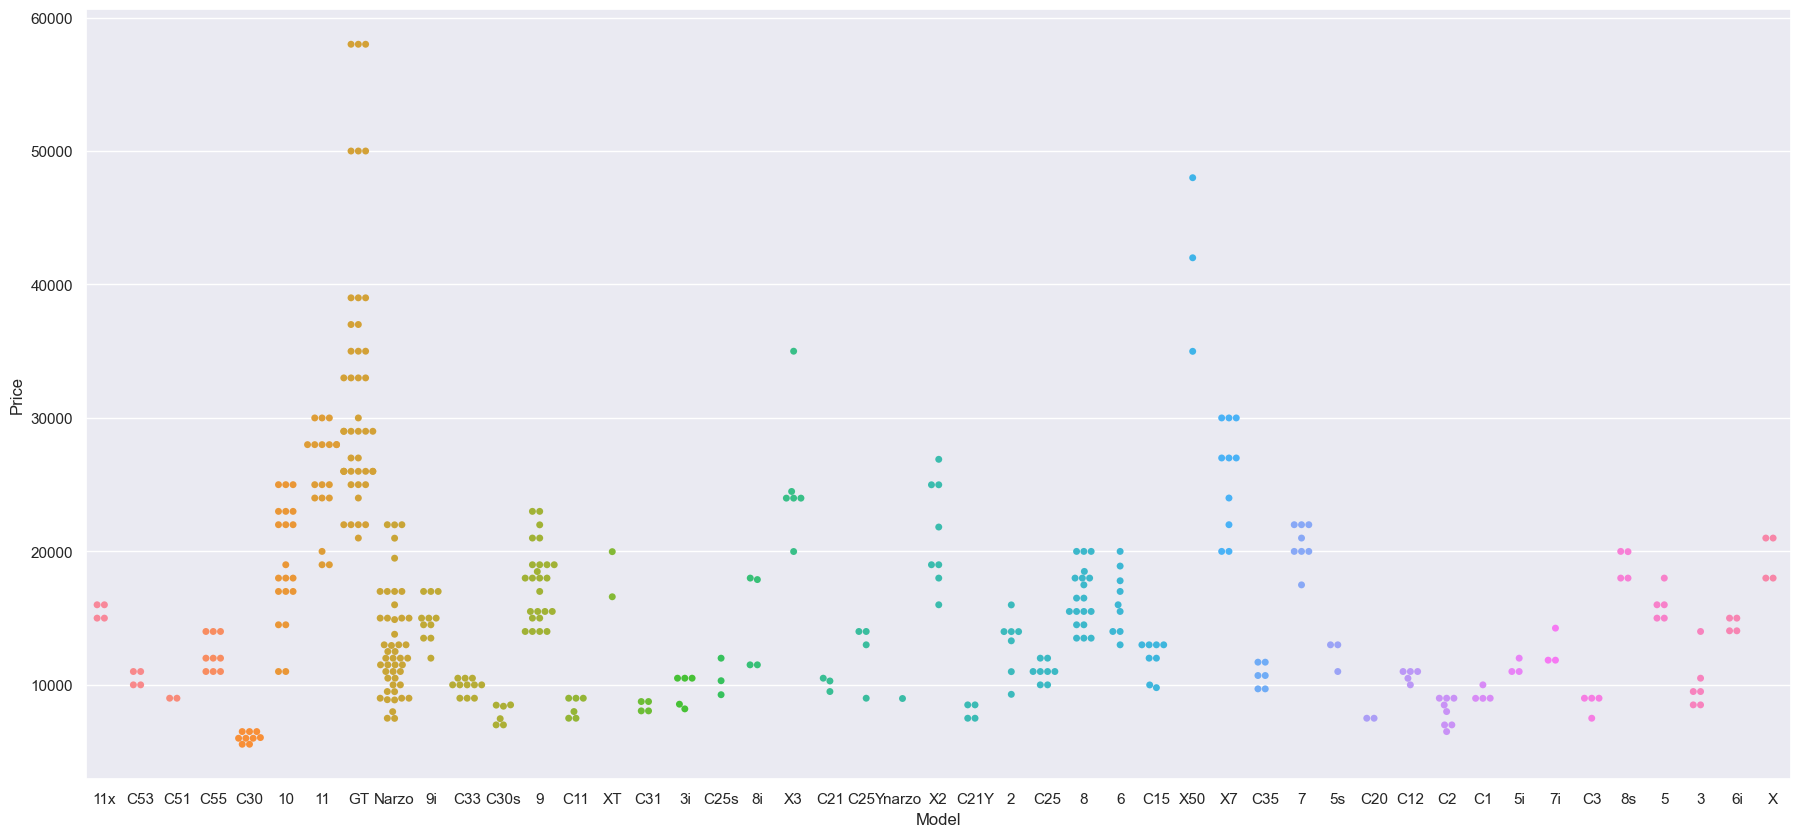

In [39]:
plt.figure(figsize=(22,10))
sns.swarmplot(x='Model', y='Price',data=df)
plt.show()

## 9) Correlation
<b> Correlation for all columns

<AxesSubplot:>

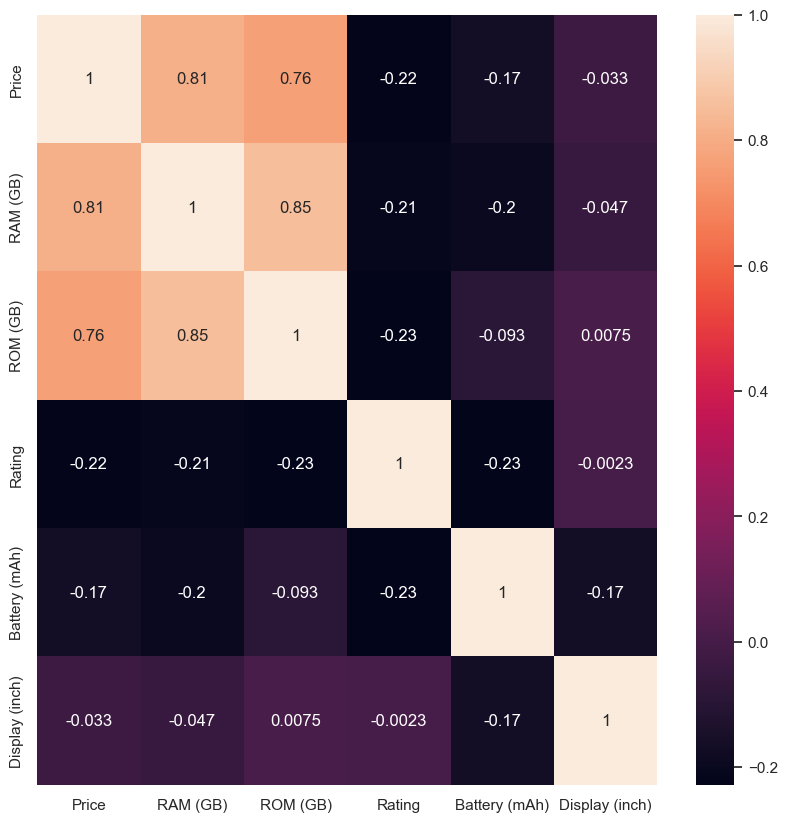

In [40]:
sns.heatmap(df.corr(),annot=True)

### Correlation for Model & Rating

<AxesSubplot:xlabel='Rating', ylabel='Model'>

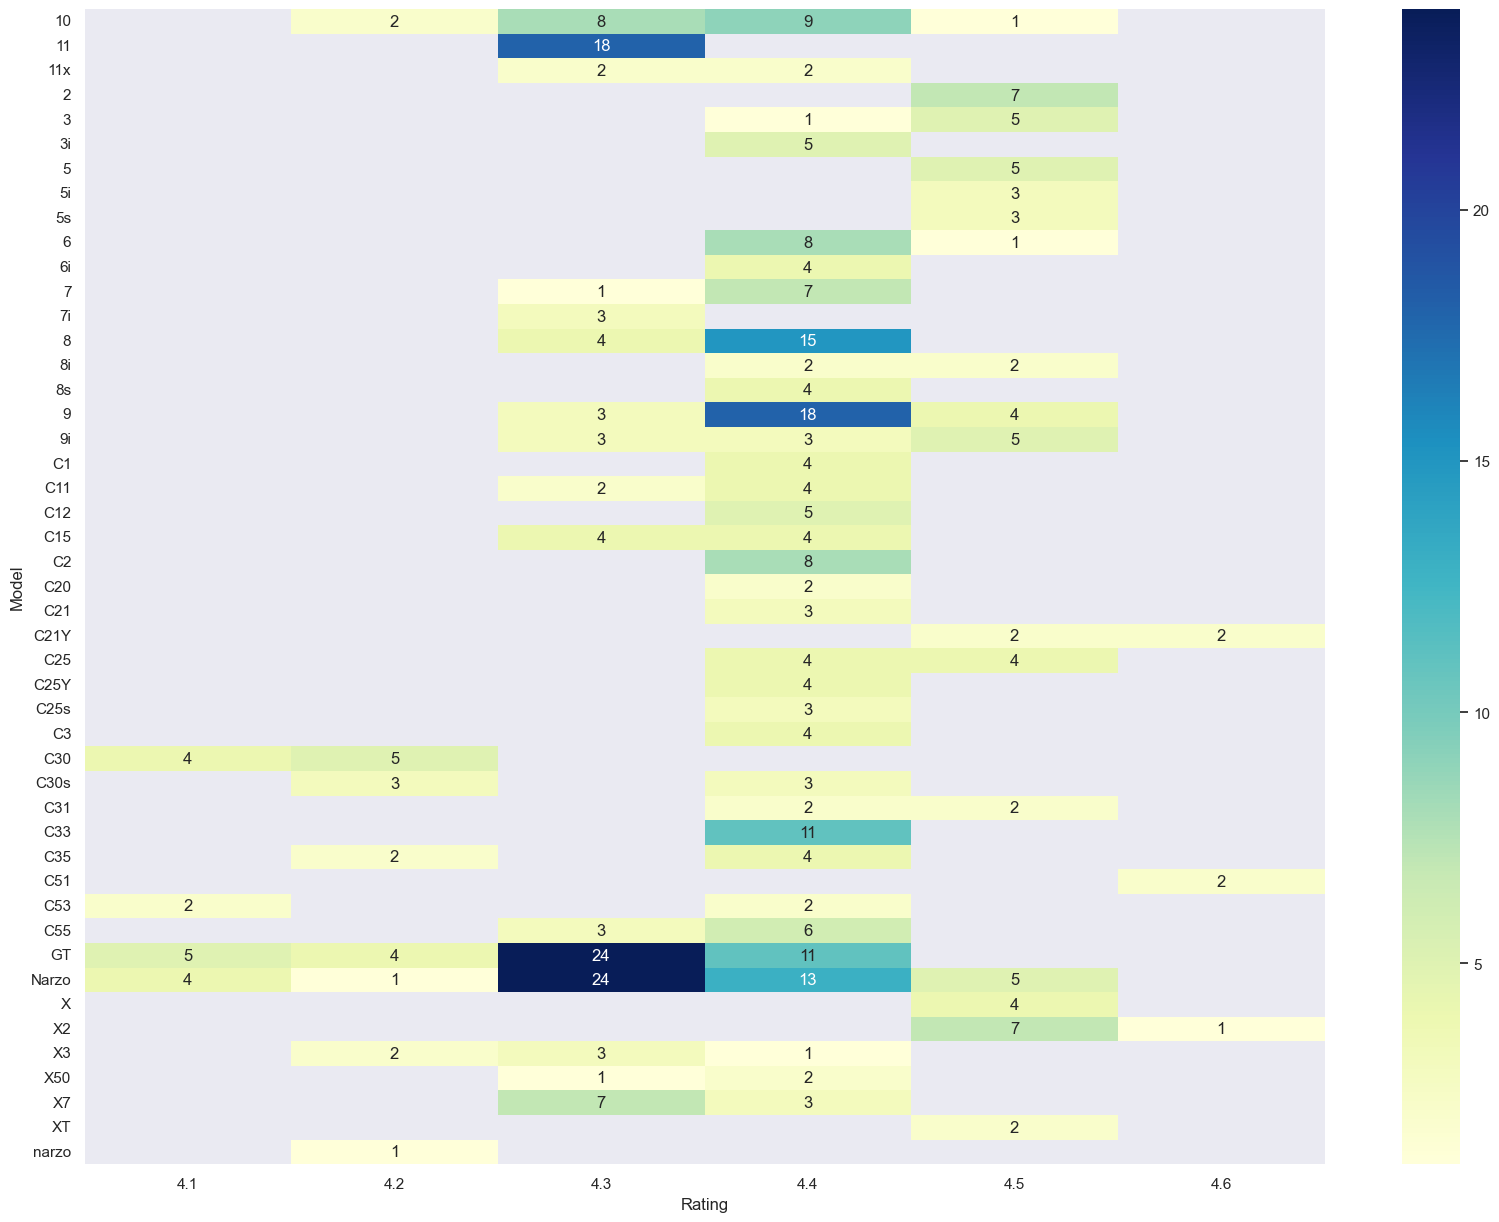

In [41]:
grp = df.groupby(['Model','Rating'])
Brand_Rating = grp.size().unstack()
Brand_Rating
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(Brand_Rating, cmap="YlGnBu", annot = True)
    

<module 'matplotlib.pyplot' from 'C:\\Users\\Administrator\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

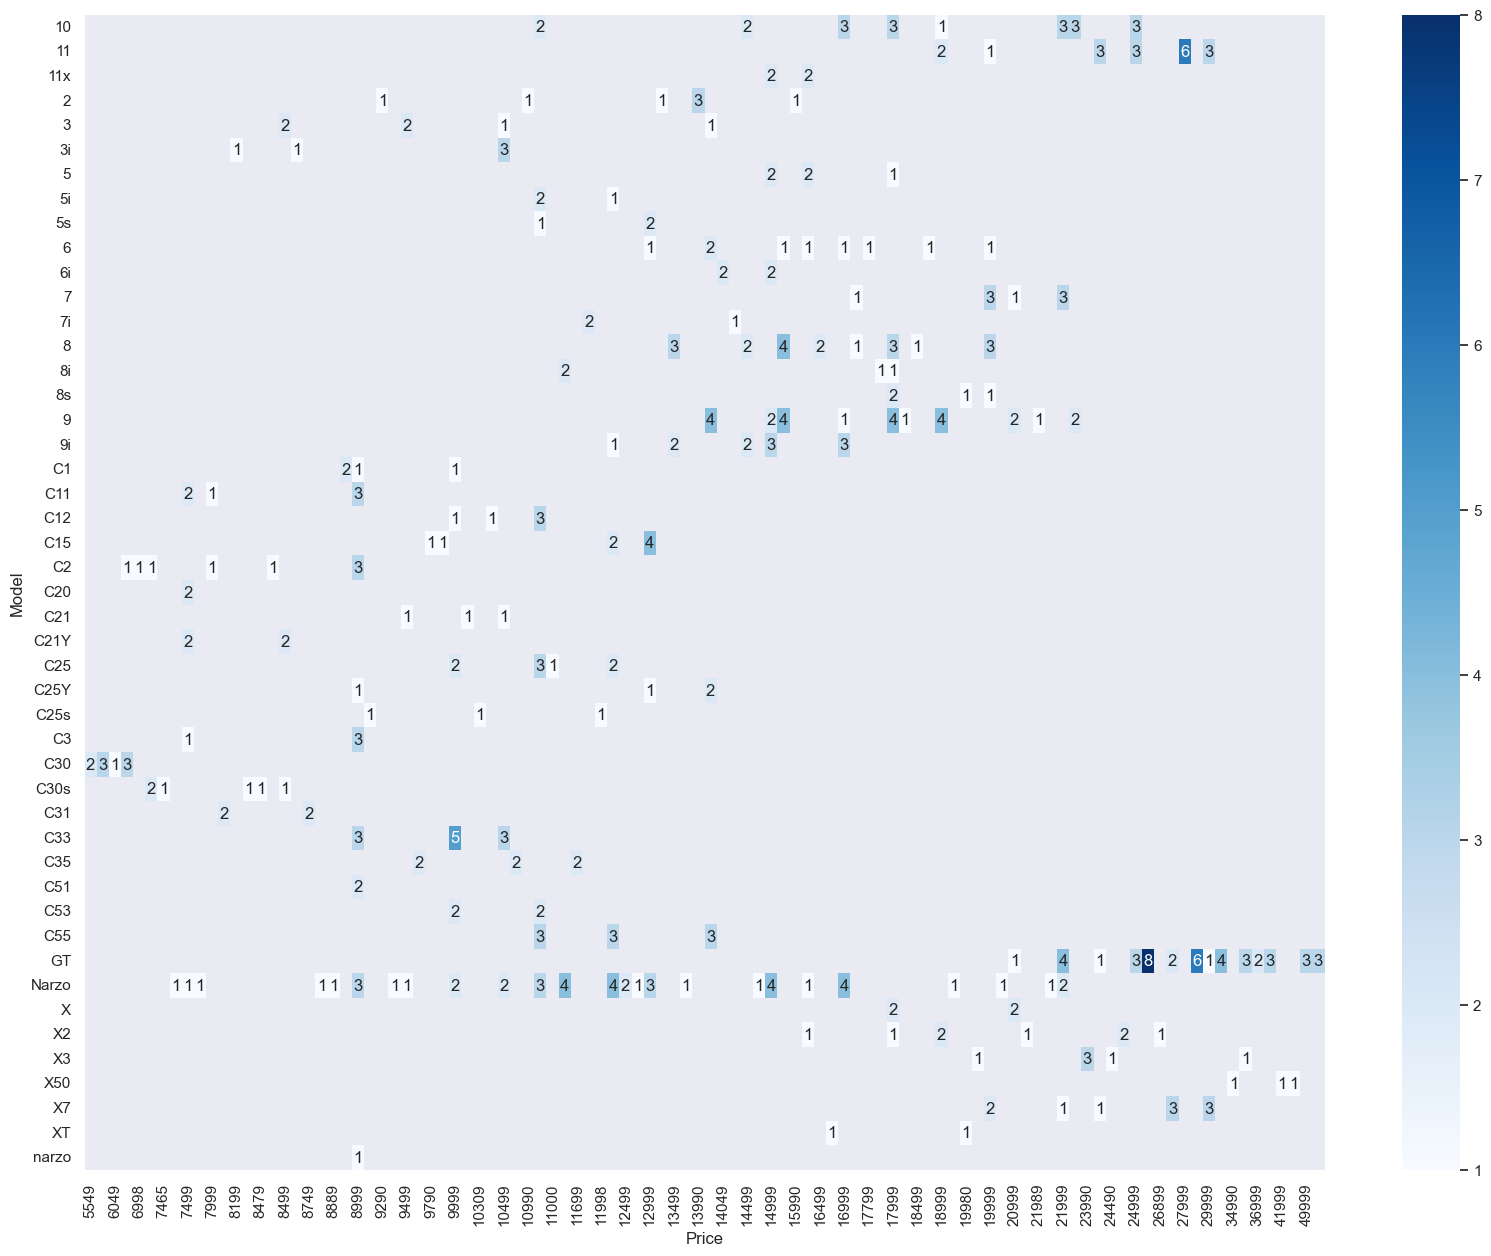

In [42]:
grp = df.groupby(['Model','Price'])
Brand_Rating = grp.size().unstack()
Brand_Rating
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(Brand_Rating, cmap="Blues", annot = True)
plt

## Conclusion

- 'X50' model has the highest price i.e, 41999/- in realme brand and its rating is 4.4, with a battery capacity of 4200 mAh.
- The model's with '4.5' rating is 'X2', 'X' and '5'.
- The model's with highest '4.3' rating is 'Narzo' and 'GT'.
- Most oftenly used Processors:
   - 1. 'Dimensity 7050'
   - 2. 'Qualcomm Snapdragon 870'
   - 3. 'Qualcomm Snapdragon 888'
   
- 126 mobiles have '6.5' inch display
- Top models
   - 1. There are '47' Realme-Narzo mobiles
   - 2. There are '44' Realme-GT mobiles
   - 3. There are '25' Realme-9 mobiles
- Realme-GT & Realme-11 are strongly correlated with price.